In [5]:
import numpy as np
import pandas as pd
Incident=pd.read_csv(r"C:\Users\agrabia\Documents\Formation\Projet/LFB Incident data Last 3 years.csv")
Mobilisation=pd.read_csv(r"C:\Users\agrabia\Documents\Formation\Projet/LFB Mobilisation data Last 3 years.csv", sep=';')
Mobilisation.drop(['CalYear','HourOfCall'], axis=1,inplace=True)
Final=Incident.merge(right=Mobilisation, on='IncidentNumber')
Final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558176 entries, 0 to 558175
Data columns (total 58 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   IncidentNumber                          558176 non-null  object 
 1   DateOfCall                              558176 non-null  object 
 2   CalYear                                 558176 non-null  int64  
 3   TimeOfCall                              558176 non-null  object 
 4   HourOfCall                              558176 non-null  int64  
 5   IncidentGroup                           558176 non-null  object 
 6   StopCodeDescription                     558176 non-null  object 
 7   SpecialServiceType                      129068 non-null  object 
 8   PropertyCategory                        558176 non-null  object 
 9   PropertyType                            558176 non-null  object 
 10  AddressQualifier                        5581

In [6]:
Final['DateOfCall_bis'] = pd.to_datetime(Final['DateOfCall'])
Final["MonthOfCall"] = Final['DateOfCall_bis'].dt.month

In [7]:
Final.head()

,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,...,DeployedFromStation_Code,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,PlusCode_Code,PlusCode_Description,DelayCodeId,DelayCode_Description,DateOfCall_bis,MonthOfCall
0,000003-01012020,01 Jan 2020,2020,00:06:30,0,Fire,Primary Fire,NaN,Non Residential,Private Garden Shed,...,G23,Hillingdon,Home Station,1,Initial,Initial Mobilisation,NaN,NaN,2020-01-01,1
1,000003-01012020,01 Jan 2020,2020,00:06:30,0,Fire,Primary Fire,NaN,Non Residential,Private Garden Shed,...,G23,Hillingdon,Home Station,2,Initial,Initial Mobilisation,NaN,NaN,2020-01-01,1
2,000008-01012020,01 Jan 2020,2020,00:11:05,0,False Alarm,AFA,NaN,Non Residential,Telephone exchange,...,H42,Richmond,Home Station,1,Initial,Initial Mobilisation,NaN,NaN,2020-01-01,1
3,000009-01012020,01 Jan 2020,2020,00:11:16,0,Fire,Secondary Fire,NaN,Outdoor Structure,Small refuse/rubbish container,...,A34,Edmonton,Home Station,1,Initial,Initial Mobilisation,9.0,"Traffic, roadworks, etc",2020-01-01,1
4,000011-01012020,01 Jan 2020,2020,00:12:02,0,False Alarm,AFA,NaN,Other Residential,Retirement/Old Persons Home,...,H35,Tooting,Home Station,1,Initial,Initial Mobilisation,NaN,NaN,2020-01-01,1


In [8]:
Final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558176 entries, 0 to 558175
Data columns (total 60 columns):
 #   Column                                  Non-Null Count   Dtype         
---  ------                                  --------------   -----         
 0   IncidentNumber                          558176 non-null  object        
 1   DateOfCall                              558176 non-null  object        
 2   CalYear                                 558176 non-null  int64         
 3   TimeOfCall                              558176 non-null  object        
 4   HourOfCall                              558176 non-null  int64         
 5   IncidentGroup                           558176 non-null  object        
 6   StopCodeDescription                     558176 non-null  object        
 7   SpecialServiceType                      129068 non-null  object        
 8   PropertyCategory                        558176 non-null  object        
 9   PropertyType                         

In [9]:
Final['DateOfCall_bis'].describe()

C:\Users\agrabia\AppData\Local\Temp\ipykernel_8820\3742424617.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  Final['DateOfCall_bis'].describe()


count                  558176
unique                   1247
top       2022-12-19 00:00:00
freq                     1009
first     2020-01-01 00:00:00
last      2023-05-31 00:00:00
Name: DateOfCall_bis, dtype: object

In [10]:
Final['MonthOfCall'].describe()

count    558176.000000
mean          6.233636
std           3.455730
min           1.000000
25%           3.000000
50%           6.000000
75%           9.000000
max          12.000000
Name: MonthOfCall, dtype: float64

In [11]:
print('il y a trop de lignes pour pouvoir avoir une vision claire donc filtre sur une année')

il y a trop de lignes pour pouvoir avoir une vision claire donc filtre sur une année


In [12]:
Final2020=Final[Final['CalYear']==2020]

In [13]:
Final2020['moyattendance'] = Final2020.groupby(['DateOfCall_bis'])['AttendanceTimeSeconds'].mean()

C:\Users\agrabia\AppData\Local\Temp\ipykernel_8820\2526537647.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Final2020['moyattendance'] = Final2020.groupby(['DateOfCall_bis'])['AttendanceTimeSeconds'].mean()


In [14]:
print('ai testé une moyenne pour avoir une meilleure représentation mais sans succès')

ai testé une moyenne pour avoir une meilleure représentation mais sans succès


In [15]:
Final2020['moyattendance'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: moyattendance, dtype: float64

<Figure size 3000x3000 with 0 Axes>

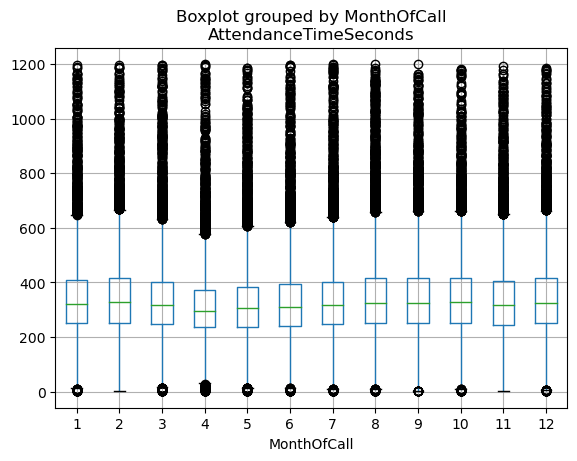

In [16]:
import matplotlib.pyplot as plt
#Final2020.plot.scatter(x='MonthOfCall', y='moyattendance');
plt.figure(figsize=(30,30))
Final2020.boxplot(column='AttendanceTimeSeconds',by='MonthOfCall')
plt.show;

In [17]:
print('on peut voir déjà que par mois, nombreux outlyers sur le temps global')

on peut voir déjà que par mois, nombreux outlyers sur le temps global


<Figure size 3000x3000 with 0 Axes>

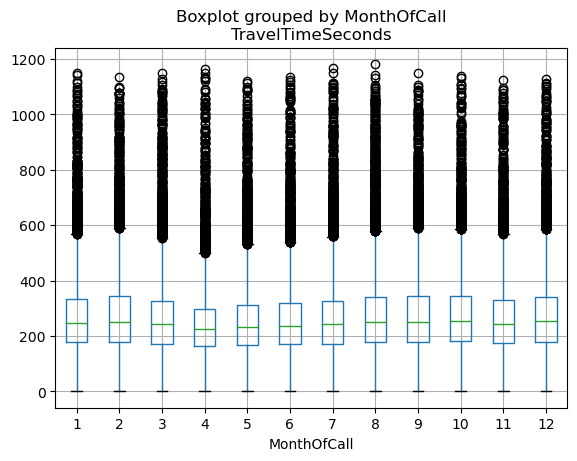

In [18]:
plt.figure(figsize=(30,30))
Final2020.boxplot(column='TravelTimeSeconds',by='MonthOfCall')
plt.show;

In [19]:
print('idem sur le temps de trajet')

idem sur le temps de trajet


<Figure size 60000x60000 with 0 Axes>

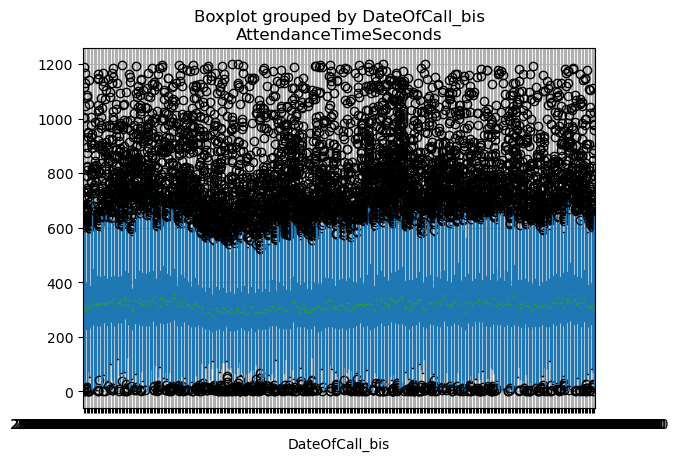

In [20]:
plt.figure(figsize=(600,600))
Final2020.boxplot(column='AttendanceTimeSeconds',by='DateOfCall_bis')
plt.show;

In [21]:
print('ai testé une représentation par jour. Illisible mais nombreux outlyers là aussi')

ai testé une représentation par jour. Illisible mais nombreux outlyers là aussi


In [22]:
Final2023=Final[Final['CalYear']==2023]

In [23]:
print('test sur les premiers mois de 2023 chargés dans la base')

test sur les premiers mois de 2023 chargés dans la base


<Figure size 50000x50000 with 0 Axes>

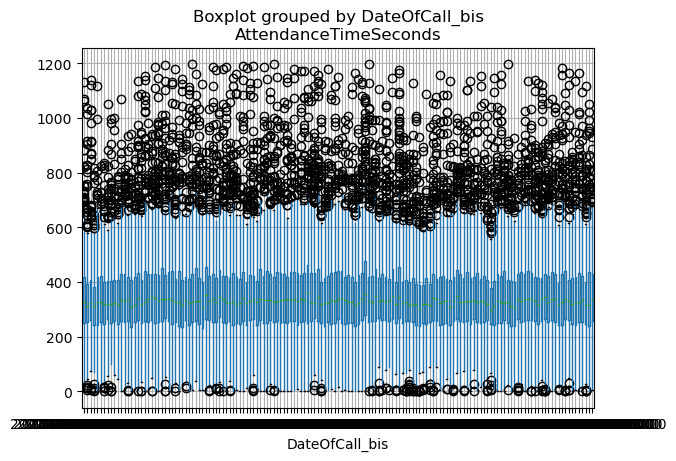

In [24]:
plt.figure(figsize=(500,500))
Final2023.boxplot(column='AttendanceTimeSeconds',by='DateOfCall_bis')
plt.show;

In [25]:
Final2023bis=Final2023[Final2023['PerformanceReporting']=='1']

In [26]:
print('pour alléger la représentation, filtre sur le temps du premier véhicule')

pour alléger la représentation, filtre sur le temps du premier véhicule


<Figure size 50000x50000 with 0 Axes>

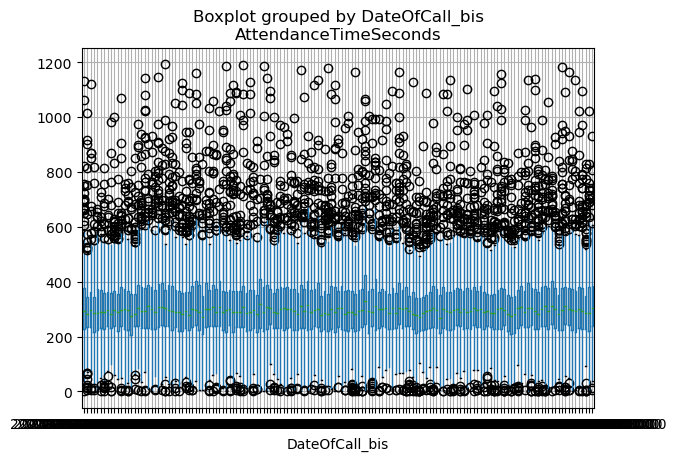

In [27]:
plt.figure(figsize=(500,500))
Final2023bis.boxplot(column='AttendanceTimeSeconds',by='DateOfCall_bis')
plt.show;

In [28]:
print('on retrouve encore de nombreux outlyers donc des temps allongés par rapport à la normale')

on retrouve encore de nombreux outlyers donc des temps allongés par rapport à la normale


In [30]:
print('en regardant le fichier Excel sur les tables envoyé par Raphaël, il y a une description de table générale, potentiellement une table de travail')

en regardant le fichier Excel sur les tables envoyé par Raphaël, il y a une description de table générale, potentiellement une table de travail


In [31]:
print('dans cette description, des données météo et des données sur les jours fériés ou vacances. Cela va dans ton sens Arthur quand tu parlais de données externes.')

dans cette description, des données météo et des données sur les jours fériés ou vacances. Cela va dans ton sens Arthur quand tu parlais de données externes.


In [32]:
print('donc oui, il y a de grosses variations de temps : démontré par les graphiques ci-dessus mais nos données ne suffisent pas expliquer ces variations cf. les heatmap')

donc oui, il y a de grosses variations de temps : démontré par les graphiques ci-dessus mais nos données ne suffisent pas expliquer ces variations cf. les heatmap
